<a href="https://colab.research.google.com/github/rogerioMB-hub/google_colab/blob/main/Perceptron03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [46]:
# criando um dataset para classificação.
#     100 amostras
n_pts = 100
#     2 centros, relativamente próximos
centers = [[-0.5, 0.5], [0.5, -0.5]]
#     gerando o dataset, com 100 amostras, uma semente fixa aleatória (=123, p.ex.),
#        com dois centroides de pontos para geração de dados e com
#        um desvio padrao de 0.4 entre as amostras geradas (isso faz com que as
#        amostras não sejam todas geradas, precisamente, no mesmo ponto). Qto maior o
#        cluster_std, mais espalhadas elas ficam do ponto inicial escolhido.
pts_, labels_ = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

In [47]:
# plotar os pontos com labels 0 em azul e com labels 1 em verde
def scatter_plot():
  plt.scatter(pts_[labels_==0, 0], pts_[labels_==0,1], c="blue")
  plt.scatter(pts_[labels_==1, 0], pts_[labels_==1,1], c="green")
  plt.show()

In [48]:
# os dados, para uso em redes neurais devem ser apresentados na forma de tensores
pts_data = torch.Tensor(pts_)
labels_data = torch.Tensor(labels_)

# Criando a classe NET() que irá definir um modelo linear de rede (perceptron) - uma reta separando conjuntos

In [49]:
class Net(nn.Module):
  def __init__(self, input_size, output_size):
    super(Net, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # aplica a função de ativação sobre a função ou modelo linear proposto
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred


# Criando um modelo com base na classe NET() - 2 entradas e uma saída

Temos duas informações de entrada e apenas uma informação de saída. Objetiva-se classificar uma amostra contendo 2 parametros em 2 conjuntos. A saída indicará se as amostras apontam para um indivíduo contido no primeiro ou no segundo grupo.

In [50]:
torch.manual_seed(2)
modelo = Net(2, 1)

# Obendo os parametros do modelo criado - objetivo é plotar gráfico da reta que separa conjuntos

In [51]:
[w, b] = list(modelo.parameters())
w1, w2 = w.view(2)
b1 = b[0]

def get_params():
  return (w1.item(), w2.item(), b1.item())

#print(get_params())


# Criando função para plotar reta.

Os parametros do modelo são obtidos com get_params() e os limites inf e sup dos pontos são obtidos visualmente dos pontos plotados no scatter()

In [52]:
def plot_fit(title):
  plt.title = title           # Não está funcionando.
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()


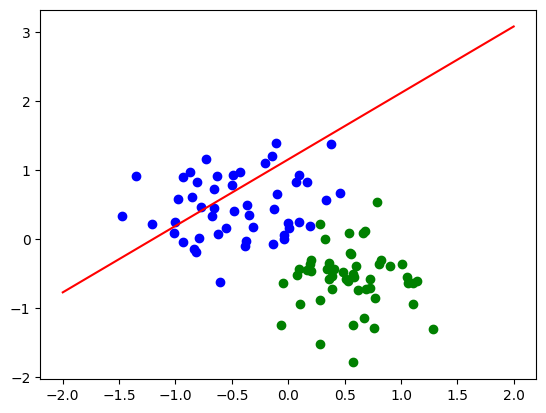

In [53]:
plot_fit('Inicial')

# O modelo linear não separa os conjuntos de forma eficiante. O método aplicado será o do gradiente descendente e assim, requer uma função de avaliação: cross- entropy

In [54]:
criterion = nn.BCELoss()  # binary cross entropy
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.01)

In [59]:
epochs = 1000  #
losses = []   #
for i in range(epochs):
  y_pred = modelo.forward(pts_data)
  loss = criterion(y_pred[:,0], labels_data)  # o tensor y_pred apresenta dimensao diferente,
                                              # do labels_data, logo modifiquei para ficar equivalente
  # ou poderia fazer isso:
  # labels_data = torch.Tensor(labels_).reshape(100,1)
  losses.append(loss.item())
  print(f"Epoch {i+1}: {loss.item()}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 1: 0.25603339076042175
Epoch 2: 0.25591474771499634
Epoch 3: 0.25579628348350525
Epoch 4: 0.2556779384613037
Epoch 5: 0.2555598020553589
Epoch 6: 0.255441814661026
Epoch 7: 0.25532397627830505
Epoch 8: 0.25520628690719604
Epoch 9: 0.25508877635002136
Epoch 10: 0.25497138500213623
Epoch 11: 0.25485414266586304
Epoch 12: 0.25473707914352417
Epoch 13: 0.25462019443511963
Epoch 14: 0.25450342893600464
Epoch 15: 0.2543868124485016
Epoch 16: 0.25427037477493286
Epoch 17: 0.2541540861129761
Epoch 18: 0.2540379464626312
Epoch 19: 0.2539219558238983
Epoch 20: 0.25380608439445496
Epoch 21: 0.2536904215812683
Epoch 22: 0.2535748779773712
Epoch 23: 0.25345945358276367
Epoch 24: 0.25334423780441284
Epoch 25: 0.25322917103767395
Epoch 26: 0.2531141936779022
Epoch 27: 0.2529994547367096
Epoch 28: 0.2528848350048065
Epoch 29: 0.252770334482193
Epoch 30: 0.2526560127735138
Epoch 31: 0.25254184007644653
Epoch 32: 0.2524277865886688
Epoch 33: 0.25231391191482544
Epoch 34: 0.2522001564502716
Epoch 3

Text(0.5, 0, 'Epoch')

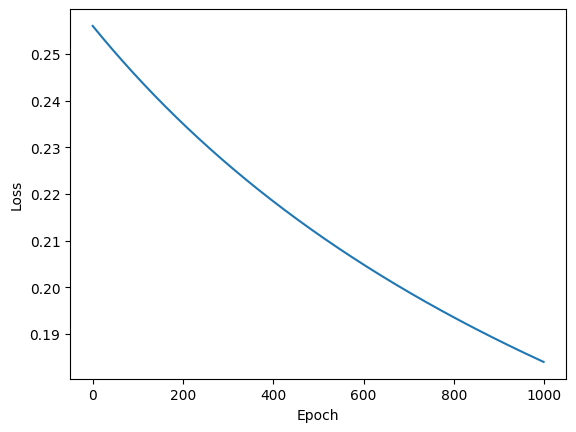

In [61]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

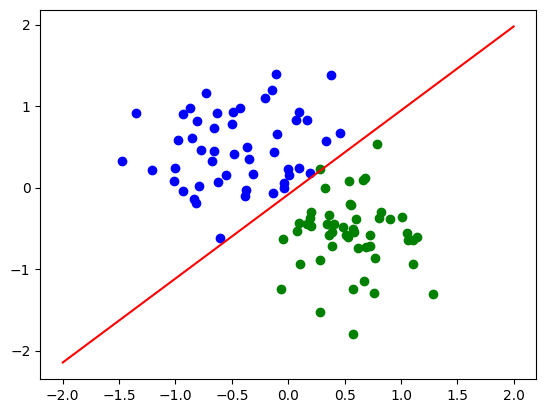

In [62]:
plot_fit('Final')
